# Modeling step

# Import tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation

# Import data

In [2]:
game_ratings = pd.read_csv('/content/drive/MyDrive/Springboard DS/data/cleaned_game_ratings.csv', index_col=0)

# From Count Vectorizer
bigram_cv = pd.read_csv('/content/drive/MyDrive/Springboard DS/data/bigram_cv.csv')
bigram_cv_test = pd.read_csv('/content/drive/MyDrive/Springboard DS/data/bigram_cv_test.csv')

In [3]:
trigram_cv = pd.read_csv('/content/drive/MyDrive/Springboard DS/data/trigram_cv.csv')
trigram_cv_test = pd.read_csv('/content/drive/MyDrive/Springboard DS/data/trigram_cv_test.csv')

In [4]:
# From TF-IDF Vectorizer
bigram_tf = pd.read_csv('/content/drive/MyDrive/Springboard DS/data/bigram_tf.csv')
bigram_tf_test = pd.read_csv('/content/drive/MyDrive/Springboard DS/data/bigram_tf_test.csv')

In [5]:
trigram_tf = pd.read_csv('/content/drive/MyDrive/Springboard DS/data/trigram_tf.csv')
trigram_tf_test = pd.read_csv('/content/drive/MyDrive/Springboard DS/data/trigram_tf_test.csv')

# Distance measures

## Binary matrix

### Hamming distance

In [6]:
hamming_bigram_cv = pairwise_distances(X=bigram_cv, metric='hamming')
hamming_trigram_cv = pairwise_distances(X=trigram_cv, metric='hamming')

hamming_bigram_cv_test = pairwise_distances(X=bigram_cv_test, metric='hamming')
hamming_trigram_cv_test = pairwise_distances(X=trigram_cv_test, metric='hamming')

Plot bigrams

Text(0.5, 1.0, 'Test data - bigrams - Hamming')

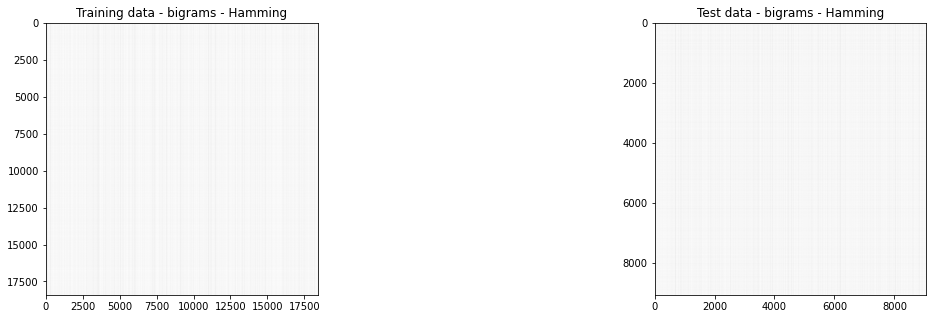

In [7]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
ax[0].imshow(hamming_bigram_cv, 'Greys')
ax[1].imshow(hamming_bigram_cv_test, 'Greys')
ax[0].set_title("Training data - bigrams - Hamming")
ax[1].set_title("Test data - bigrams - Hamming")

In [8]:
hamming_bigram_tf = pairwise_distances(X=bigram_tf, metric='hamming')
hamming_trigram_tf = pairwise_distances(X=trigram_tf, metric='hamming')

hamming_bigram_tf_test = pairwise_distances(X=bigram_tf_test, metric='hamming')
hamming_trigram_tf_test = pairwise_distances(X=trigram_tf_test, metric='hamming')

Plot trigrams

Text(0.5, 1.0, 'Test data - trigrams - Hamming')

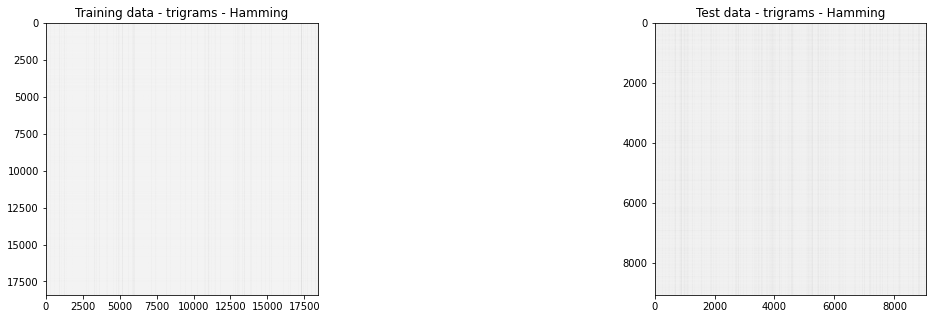

In [9]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
ax[0].imshow(hamming_trigram_cv, "Greys")
ax[1].imshow(hamming_trigram_cv_test, "Greys")
ax[0].set_title("Training data - trigrams - Hamming")
ax[1].set_title("Test data - trigrams - Hamming")

### Jaccard index

In [ ]:
# This cell crashes
jaccard_bigram_cv = pairwise_distances(X=bigram_cv.values, metric='jaccard')
jaccard_trigram_cv = pairwise_distances(X=trigram_cv.values, metric='jaccard')

jaccard_bigram_cv_test = pairwise_distances(X=bigram_cv_test.values, metric='jaccard')
jaccard_trigram_cv_test = pairwise_distances(X=trigram_cv_test.values, metric='jaccard')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Plot bigrams

In [ ]:
# This cell crashes
fig, ax = plt.subplots(1,2)
ax[0].imshow(jaccard_bigram_cv, "Greys")
ax[1].imshow(jaccard_bigram_cv_test, "Greys")
ax[0].set_title("Training data - bigrams - Jaccard")
ax[1].set_title("Test data - bigrams - Jaccard")

In [ ]:
# This cell crashes
jaccard_bigram_tf = pairwise_distances(X=bigram_tf.values, metric='jaccard')
jaccard_trigram_tf = pairwise_distances(X=trigram_tf.values, metric='jaccard')

jaccard_bigram_tf_test = pairwise_distances(X=bigram_tf_test.values, metric='jaccard')
jaccard_trigram_tf_test = pairwise_distances(X=trigram_tf_test.values, metric='jaccard')

print(f"The Jaccard index for the TF-IDF Vectorizer is {jaccard_bigram_tf} for the training bigrams and {jaccard_bigram_tf_test} for the test set")
print(f"The Jaccard index for the trigrams is {jaccard_trigram_tf} for the training set and {jaccard_trigram_tf_test} for the test set")

Plot trigrams

In [ ]:
# This cell crashes
fig, ax = plt.subplots(1,2)
ax[0].imshow(jaccard_trigram_cv, "Greys")
ax[1].imshow(jaccard_trigram_cv_test, "Greys")
ax[0].set_title("Training data - trigrams - Jaccard")
ax[1].set_title("Test data - trigrams - Jaccard")

## Continuous matrix

### Euclidean distance

In [6]:
eucl_bigram_cv = pairwise_distances(X=bigram_cv.values, metric='euclidean')
eucl_trigram_cv = pairwise_distances(X=trigram_cv.values, metric='euclidean')

eucl_bigram_cv_test = pairwise_distances(X=bigram_cv_test.values, metric='euclidean')
eucl_trigram_cv_test = pairwise_distances(X=trigram_cv_test.values, metric='euclidean')

print(f"The Euclidian distance for the CountVectorizer is {eucl_bigram_cv} for the training bigrams and {eucl_bigram_cv_test} for the test set")
print(f"The Euclidian distance for the trigrams is {eucl_trigram_cv} for the training set and {eucl_trigram_cv_test} for the test set")

The Euclidian distance for the CountVectorizer is [[0.00000000e+00 1.41421356e+00 2.00000000e+00 ... 1.84030000e+04
  1.84040000e+04 1.84050001e+04]
 [1.41421356e+00 0.00000000e+00 1.41421356e+00 ... 1.84020001e+04
  1.84030001e+04 1.84040001e+04]
 [2.00000000e+00 1.41421356e+00 0.00000000e+00 ... 1.84010000e+04
  1.84020000e+04 1.84030001e+04]
 ...
 [1.84030000e+04 1.84020001e+04 1.84010000e+04 ... 0.00000000e+00
  1.73205081e+00 2.44948974e+00]
 [1.84040000e+04 1.84030001e+04 1.84020000e+04 ... 1.73205081e+00
  0.00000000e+00 2.23606798e+00]
 [1.84050001e+04 1.84040001e+04 1.84030001e+04 ... 2.44948974e+00
  2.23606798e+00 0.00000000e+00]] for the training bigrams and [[0.00000000e+00 1.73205081e+00 3.16227766e+00 ... 9.06400011e+03
  9.06500011e+03 9.06600011e+03]
 [1.73205081e+00 0.00000000e+00 2.23606798e+00 ... 9.06300000e+03
  9.06400000e+03 9.06500000e+03]
 [3.16227766e+00 2.23606798e+00 0.00000000e+00 ... 9.06200022e+03
  9.06300022e+03 9.06400022e+03]
 ...
 [9.06400011e+03 9.

In [7]:
eucl_bigram_tf = pairwise_distances(X=bigram_tf.values, metric='euclidean')
eucl_trigram_tf = pairwise_distances(X=trigram_tf.values, metric='euclidean')

eucl_bigram_tf_test = pairwise_distances(X=bigram_tf_test.values, metric='euclidean')
eucl_trigram_tf_test = pairwise_distances(X=trigram_tf_test.values, metric='euclidean')

print(f"The Euclidian distance for the TF-IDF Vectorizer is {eucl_bigram_tf} for the training bigrams and {eucl_bigram_tf_test} for the test set")
print(f"The Euclidian distance for the trigrams is {eucl_trigram_tf} for the training set and {eucl_trigram_tf_test} for the test set")

The Euclidian distance for the TF-IDF Vectorizer is [[0.00000000e+00 1.41421356e+00 2.00000000e+00 ... 1.84030000e+04
  1.84040000e+04 1.84050000e+04]
 [1.41421356e+00 0.00000000e+00 1.41421356e+00 ... 1.84020001e+04
  1.84030001e+04 1.84040001e+04]
 [2.00000000e+00 1.41421356e+00 0.00000000e+00 ... 1.84010000e+04
  1.84020000e+04 1.84030000e+04]
 ...
 [1.84030000e+04 1.84020001e+04 1.84010000e+04 ... 0.00000000e+00
  1.73205081e+00 2.30223418e+00]
 [1.84040000e+04 1.84030001e+04 1.84020000e+04 ... 1.73205081e+00
  0.00000000e+00 1.73205081e+00]
 [1.84050000e+04 1.84040001e+04 1.84030000e+04 ... 2.30223418e+00
  1.73205081e+00 0.00000000e+00]] for the training bigrams and [[0.00000000e+00 1.41421356e+00 2.44948974e+00 ... 9.06400006e+03
  9.06500006e+03 9.06600006e+03]
 [1.41421356e+00 0.00000000e+00 1.41421356e+00 ... 9.06300000e+03
  9.06400000e+03 9.06500000e+03]
 [2.44948974e+00 1.41421356e+00 0.00000000e+00 ... 9.06200006e+03
  9.06300006e+03 9.06400006e+03]
 ...
 [9.06400006e+03 

### Cosine similarity

In [8]:
cosine_bigram_cv = pairwise_distances(X=bigram_cv, metric='cosine')
cosine_trigram_cv = pairwise_distances(X=trigram_cv, metric='cosine')

cosine_bigram_cv_test = pairwise_distances(X=bigram_cv_test, metric='cosine')
cosine_trigram_cv_test = pairwise_distances(X=trigram_cv_test, metric='cosine')

print(f"The cosine similarity for the CountVectorizer is {cosine_bigram_cv} for the training bigrams and {cosine_bigram_cv_test} for the test set")
print(f"The cosine similarity for the trigrams is {cosine_trigram_cv} for the training set and {cosine_trigram_cv_test} for the test set")

The cosine similarity for the CountVectorizer is [[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.22044605e-16 2.92893219e-01 ... 2.92893220e-01
  2.92893220e-01 2.92893222e-01]
 [1.00000000e+00 2.92893219e-01 0.00000000e+00 ... 1.47636170e-09
  1.47620127e-09 4.42812231e-09]
 ...
 [1.00000000e+00 2.92893220e-01 1.47636170e-09 ... 1.11022302e-16
  2.95256297e-09 2.95208158e-09]
 [1.00000000e+00 2.92893220e-01 1.47620127e-09 ... 2.95256297e-09
  1.11022302e-16 5.90432359e-09]
 [1.00000000e+00 2.92893222e-01 4.42812231e-09 ... 2.95208158e-09
  5.90432359e-09 0.00000000e+00]] for the training bigrams and [[2.22044605e-16 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 0.00000000e+00 2.92893219e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.92893219e-01 2.22044605e-16 ... 2.92893219e-01
  2.92893219e-01 2.92893219e-01]
 ...
 [1.00000000e+00 0.0

In [ ]:
# This cell crashes
cosine_bigram_tf = pairwise_distances(X=bigram_tf, metric='cosine')
cosine_trigram_tf = pairwise_distances(X=trigram_tf, metric='cosine')

cosine_bigram_tf_test = pairwise_distances(X=bigram_tf_test, metric='cosine')
cosine_trigram_tf_test = pairwise_distances(X=trigram_tf_test, metric='cosine')

print(f"The cosine similarity for the TF-IDF Vectorizer is {cosine_bigram_tf} for the training bigrams and {cosine_bigram_tf_test} for the test set")
print(f"The cosine similarity for the trigrams is {cosine_trigram_tf} for the training set and {cosine_trigram_tf_test} for the test set")

# Clustering: K-Means

Set up KMeans, calculate clusters from labels, fit to training data, and predict y_pred for each

In [6]:
true_k_bigram_cv = np.unique(bigram_cv.columns).shape[0]
true_k_trigram_cv = np.unique(trigram_cv.columns).shape[0]

true_k_bigram_tf = np.unique(bigram_tf.columns).shape[0]
true_k_trigram_tf = np.unique(trigram_tf.columns).shape[0]
# Pulled the concept for true_k from: https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py

bigram_cv_kmeans_pred = MiniBatchKMeans(n_clusters=true_k_bigram_cv, init='k-means++',
                                        random_state=42, batch_size=1024).fit_predict(bigram_cv)
trigram_cv_kmeans_pred = MiniBatchKMeans(n_clusters=true_k_trigram_cv, init='k-means++',
                                         random_state=42, batch_size=1024).fit_predict(trigram_cv)

bigram_tf_kmeans_pred = MiniBatchKMeans(n_clusters=true_k_bigram_tf, init='k-means++',
                                        random_state=42, batch_size=1024).fit_predict(bigram_tf)
trigram_tf_kmeans_pred = MiniBatchKMeans(n_clusters=true_k_trigram_tf, init='k-means++',
                                         random_state=42, batch_size=1024).fit_predict(trigram_tf)

Metrics from running KMeans

In [7]:
print("Bigrams - CountVectorizer")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(bigram_cv.columns, bigram_cv_kmeans_pred.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(bigram_cv.columns, bigram_cv_kmeans_pred.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(bigram_cv.columns, bigram_cv_kmeans_pred.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(bigram_cv.columns, bigram_cv_kmeans_pred.labels_))

print()
print("Trigrams - CountVectorizer")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(trigram_cv.columns, trigram_cv_kmeans_pred.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(trigram_cv.columns, trigram_cv_kmeans_pred.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(trigram_cv.columns, trigram_cv_kmeans_pred.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(trigram_cv.columns, trigram_cv_kmeans_pred.labels_))

print()
print("Bigrams - TF-IDF Vectorizer")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(bigram_tf.columns, bigram_tf_kmeans_pred.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(bigram_tf.columns, bigram_tf_kmeans_pred.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(bigram_tf.columns, bigram_tf_kmeans_pred.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(bigram_tf.columns, bigram_tf_kmeans_pred.labels_))

print()
print("Trigrams - TF-IDF Vectorizer")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(trigram_tf.columns, trigram_tf_kmeans_pred.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(trigram_tf.columns, trigram_tf_kmeans_pred.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(trigram_tf.columns, trigram_tf_kmeans_pred.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(trigram_tf.columns, trigram_tf_kmeans_pred.labels_))

Bigrams - CountVectorizer


AttributeError: ignored

Top terms per cluster

In [8]:
print("Top terms: bigrams from CountVectorizer")
bi_cv_order_centroids = bigram_cv_kmeans_pred.cluster_centers_.argsort()[:, ::-1]

for i in range(true_k_bigram_cv):
    print("Cluster %d:" % i, end="")
    for ind in bi_cv_order_centroids[i, :10]:
        print(" %s" % bigram_cv.columns[ind], end="")
    print()


print("Top terms: trigrams from CountVectorizer")
tri_cv_order_centroids = trigram_cv_kmeans_pred.cluster_centers_.argsort()[:, ::-1]

for i in range(true_k_trigram_cv):
    print("Cluster %d:" % i, end="")
    for ind in tri_cv_order_centroids[i, :10]:
        print(" %s" % trigram_cv.columns[ind], end="")
    print()


print("Top terms: bigrams from TF-IDF Vectorizer")
bi_tf_order_centroids = bigram_tf_kmeans_pred.cluster_centers_.argsort()[:, ::-1]

for i in range(true_k_bigram_tf):
    print("Cluster %d:" % i, end="")
    for ind in bi_tf_order_centroids[i, :10]:
        print(" %s" % bigram_tf.columns[ind], end="")
    print()


print("Top terms: bigrams from TF-IDF Vectorizer")
tri_tf_order_centroids = trigram_tf_kmeans_pred.cluster_centers_.argsort()[:, ::-1]

for i in range(true_k_trigram_tf):
    print("Cluster %d:" % i, end="")
    for ind in tri_tf_order_centroids[i, :10]:
        print(" %s" % trigram_tf.columns[ind], end="")
    print()

Top terms: bigrams from CountVectorizer


AttributeError: ignored

# Topic modeling

## NMF

Instantiate model

In [9]:
nmf_model = NMF(n_components=2, init='nndsvdar', random_state=42, max_iter=100)

Fit CrossVectorized training sets with NMF

In [10]:
nmf_topics_bigram_cv = nmf_model.fit_transform(bigram_cv)
nmf_topics_trigram_cv = nmf_model.fit_transform(trigram_cv)

Transform CrossVectorized training sets with NMF

In [11]:
nmf_topics_bigram_cv_test = nmf_model.transform(bigram_cv_test)
nmf_topics_trigram_cv_test = nmf_model.transform(trigram_cv_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- absolutely love
- abstract games
- abstract strategy
- action cards
- action selection
- ...
Feature names seen at fit time, yet now missing:
- boardgamegeek com thread
- cards don t
- didn t enjoy
- didn t feel
- didn t think
- ...

  warnings.warn(message, FutureWarning)


ValueError: ignored

Output components from Count Vectorizer test data

In [12]:
components_bigram_cv_df = pd.DataFrame(nmf_topics_bigram_cv_test.components_, columns=bigram_cv.columns)
components_trigram_cv_df = pd.DataFrame(nmf_topics_trigram_cv_test.components_, columns=trigram_cv.columns)

for topic in range(components_bigram_cv_df.shape[0]):
    tmp = components_bigram_cv_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

for topic in range(components_trigram_cv_df.shape[0]):
    tmp = components_trigram_cv_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

NameError: ignored

Fit TF-IDF Vectorized training sets with NMF

In [ ]:
nmf_topics_bigram_tf = nmf_model.fit_transform(bigram_tf)
nmf_topics_trigram_tf = nmf_model.fit_transform(trigram_tf)

Transform TF-IDF Vectorized training sets with LDA

In [ ]:
nmf_topics_bigram_tf_test = nmf_model.transform(bigram_tf_test)
nmf_topics_trigram_tf_test = nmf_model.transform(trigram_tf_test)

Output components from TF-IDF test data

In [ ]:
components_bigram_tf_df = pd.DataFrame(nmf_topics_bigram_tf_test.components_, columns=bigram_tf.columns)
components_trigram_tf_df = pd.DataFrame(nmf_topics_trigram_tf_test.components_, columns=trigram_tf.columns)

for topic in range(components_bigram_tf_df.shape[0]):
    tmp = components_bigram_tf_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

for topic in range(components_trigram_tf_df.shape[0]):
    tmp = components_trigram_tf_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

## LDA

Instantiate model

In [13]:
lda = LatentDirichletAllocation(n_components=5, random_state=42, learning_method="batch")

Fit CrossVectorized training sets with LDA

In [14]:
lda_topics_bigram_cv = lda.fit_transform(bigram_cv)
lda_topics_trigram_cv = lda.fit_transform(trigram_cv)

Tranform CrossVectorized test sets with LDA 

In [15]:
lda_topics_bigram_cv_test = lda.transform(bigram_cv_test)
lda_topics_trigram_cv_test = lda.transform(trigram_cv_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- absolutely love
- abstract games
- abstract strategy
- action cards
- action selection
- ...
Feature names seen at fit time, yet now missing:
- boardgamegeek com thread
- cards don t
- didn t enjoy
- didn t feel
- didn t think
- ...

  warnings.warn(message, FutureWarning)


ValueError: ignored

Fit TF-IDF Vectorized training sets with LDA

In [ ]:
lda_topics_bigram_tf = lda.fit_transform(bigram_tf)
lda_topics_trigram_tf = lda.fit_transform(trigram_tf)

Transform TF-IDF Vectorized test sets with LDA

In [ ]:
lda_topics_bigram_tf_test = lda.transform(bigram_tf_test)
lda_topics_trigram_tf_test = lda.transform(trigram_tf_test)

# Summary and Conclusions